In [1]:
import os
import numpy as np 
import sys
import hyperspy.api as hs
import mrcz
sys.path.append("..")
import tomondt
from tomondt import Operator
import pickle
paths = [os.path.join(os.getcwd(),"..", "Data", "NC-"+ str(i)+".vmf") for i in range(4)]
times=  np.linspace(1, 100, 100)
gr, alpha = (1+np.sqrt(5))/2, np.radians(140)
angles = np.degrees(((times *gr*alpha)%alpha)-(alpha/2))

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import shutil

In [2]:
times=  np.linspace(1, 100, 100)
gr, alpha = (1+np.sqrt(5))/2, np.radians(140)
angles = np.degrees(((times *gr*alpha)%alpha)-(alpha/2))
nc =  tomondt.load_phantom("cube",64,512).astype(float)
nc =  tomondt.load_phantom("rod",512,500,100).astype(float)
#pb = (512 - 128) // 2
#pa = 512 - 128 - pb
#nc = np.pad(nc, ((pb, pa), (pb, pa), (pb, pa)), mode="constant", constant_values=0)

paths = [os.path.join(os.getcwd(),"..", "Publication-Data", "Rod-"+ str(i)+".vmf") for i in range(4)]

vmf = tomondt.load_vmf(paths[1],nc)
faces = {1:0.5, 2: 0.5, 3: 1}
#growth = tomondt.deformations.ParticleGrowth(1.5,25,200,faces)
#growth.kernel = np.array([[[0,0,0],[0,1,0],[0,0,0]],[[0,1,0],[1,0,1],[0,1,0]],[[0,0,0],[0,1,0],[0,0,0]]])
#bd = lambda x: growth.grow(x)
#bd = lambda x: tomondt.deformations.beamdamage(x, 0.89, 0.5)
alloying = tomondt.deformations.Alloying(nc,10,3)
bd = lambda x: alloying.run(x)
vmf = Operator('cupy',0).deform(vmf,times, bd)

OutOfMemoryError: Out of memory allocating 1,073,741,824 bytes (allocated so far: 4,294,978,048 bytes).

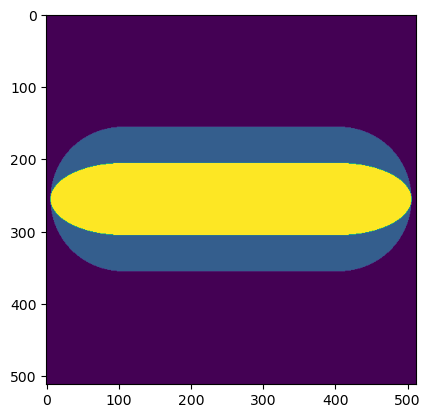

In [7]:
nc =  tomondt.load_phantom("rod",512,500,100).astype(float)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(nc[256,:,:])
plt.show()

In [ ]:
paths = [os.path.join(os.getcwd(),"..", "Publication-Data", "Cube-"+ str(i)+".vmf") for i in range(4)]
vmf = tomondt.load_vmf(paths[3])
viewer = tomondt.Viewer()
viewer.add_volume(vmf)

#viewer.animate_volume(vmf,os.path.join(os.getcwd(),"..", "Publication-Data", "NC-"+ str(1)+"-ref.mp4"),2)